## Descriptive Statistics and Analysis - Complete Dataset Lab and Prolific

v2_19.04.2024

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_rel, ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import zscore

### Descriptive Statistics

In [2]:
# Load the data
data = pd.read_csv('data_merged_all_analysis.csv')

In [3]:
# Look at data
data.head()

,ID,AGE,WORK,Gender_Männlich,Gender_Weiblich,Edu_Abgeschlossene_Berufsausbildung,Edu_Mittlere_Reife_Realschulabschluss,Edu_Abitur_oder_Fachabitur,Edu_Bachelor,Edu_Master,...,Average_Word_Count_Prompts,First_Prompt_Word_Count,Total_Word_Count_Prompt,time_total,time_demogr,time_pers,time_task1,time_survey1,time_task2,time_survey2
0,ABO2606,22.0,25.0,1,0,0,0,0,1,0,...,39.333333,100.0,118.0,35.038667,9.134167,1.056333,11.980833,1.290833,11.509667,0.066833
1,APE2704,20.0,15.0,1,0,0,0,1,0,0,...,108.750000,128.0,435.0,23.169333,2.530833,1.257667,6.372500,1.443167,11.385000,0.180167
2,SSG0102,20.0,20.0,1,0,0,0,1,0,0,...,11.571429,5.0,81.0,34.525167,3.595667,1.301500,10.433000,1.658333,14.911000,2.625667
3,ECH2807,21.0,30.0,1,0,0,0,1,0,0,...,55.750000,57.0,223.0,46.279833,1.717167,0.610833,21.664167,0.892167,19.574333,1.821167
4,AST1210,25.0,60.0,1,0,0,0,0,0,0,...,20.500000,27.0,41.0,28.102000,3.470833,1.178833,12.412667,1.634500,6.445500,2.959667


In [3]:
# Basic Descriptive Statistics for all the variables
descriptive_stats = data.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
              ID        AGE        WORK  Gender_Männlich  Gender_Weiblich  \
count        68  68.000000   68.000000        68.000000        68.000000   
unique       68        NaN         NaN              NaN              NaN   
top     ABO2606        NaN         NaN              NaN              NaN   
freq          1        NaN         NaN              NaN              NaN   
mean        NaN  29.632353   59.250000         0.705882         0.294118   
std         NaN  10.250452   36.593114         0.459033         0.459033   
min         NaN  18.000000    0.000000         0.000000         0.000000   
25%         NaN  23.000000   24.500000         0.000000         0.000000   
50%         NaN  27.000000   60.000000         1.000000         0.000000   
75%         NaN  32.000000  100.000000         1.000000         1.000000   
max         NaN  71.000000  100.000000         1.000000         1.000000   

        Edu_Abgeschlossene_Berufsausbildung  \
count          

In [4]:
# Look at distribution of genders
gender_distribution = data[['Gender_Männlich', 'Gender_Weiblich']].sum()
print(gender_distribution)

Gender_Männlich    48
Gender_Weiblich    20
dtype: int64


In [5]:
# Look at distribution of education levels
education_levels = data[['Edu_Abgeschlossene_Berufsausbildung', 'Edu_Mittlere_Reife_Realschulabschluss', 'Edu_Abitur_oder_Fachabitur', 'Edu_Bachelor', 'Edu_Master', 'Edu_Doktortitel',]].sum()
print(education_levels)

Edu_Abgeschlossene_Berufsausbildung       8
Edu_Mittlere_Reife_Realschulabschluss     1
Edu_Abitur_oder_Fachabitur               18
Edu_Bachelor                             21
Edu_Master                               18
Edu_Doktortitel                           1
dtype: int64


In [6]:
# Look at distribution for the randomized groups 
group_order_distribution = data['Group_Nr'].value_counts()
print("\nNr - Cnt\n",group_order_distribution)


Nr - Cnt
 Group_Nr
4.0    12
5.0    12
2.0     9
1.0     8
3.0     8
7.0     8
8.0     6
6.0     5
Name: count, dtype: int64


In [7]:
# Look at distribution for the experimental conditions
experimental_distribution = data['Prompt_Support'].value_counts()
print("\nI - II\n",experimental_distribution)


I - II
 Prompt_Support
0    36
1    32
Name: count, dtype: int64


In [8]:
# Look at mean values for JC and SDT
jcsdt = data[['JC1IStR', 'JC2IStR', 'JC1HRJD', 'JC2HRJD', 'SDT1AUT', 'SDT2AUT', 'SDT1COM', 'SDT2COM']].mean()
print(jcsdt)

JC1IStR    3.215441
JC2IStR    3.561765
JC1HRJD    2.504902
JC2HRJD    4.174020
SDT1AUT    3.397059
SDT2AUT    3.029412
SDT1COM    3.500000
SDT2COM    3.941176
dtype: float64


In [9]:
# Look at mean values for the Big Five
big_five_distribution = data[['NEOE', 'NEOA', 'NEOC', 'NEON', 'NEOO']].mean()
print(big_five_distribution)

NEOE    3.198529
NEOA    3.147059
NEOC    3.713235
NEON    2.897059
NEOO    3.752941
dtype: float64


In [10]:
# Calculate mean time for each 'Prompt_Support' group to see if there are big differences 
mean_time_with_support = data[data['Prompt_Support'] == 1]['time_total'].mean()
mean_time_without_support = data[data['Prompt_Support'] == 0]['time_total'].mean()
print(f"Mean Time with Prompt Support: {mean_time_with_support}")
print(f"Mean Time without Prompt Support: {mean_time_without_support}")

Mean Time with Prompt Support: 38.46575000009375
Mean Time without Prompt Support: 34.255004629907404


In [15]:
# Look at distribution of age
age_distribution = data['AGE'].value_counts()
print(age_distribution)

# Look at mean age
age_mean = data[['AGE']].mean()
print("\nMean age:\n", age_mean)

AGE
22.0    6
30.0    6
25.0    5
26.0    4
20.0    4
28.0    4
23.0    4
33.0    4
24.0    4
27.0    3
21.0    3
29.0    3
31.0    2
32.0    2
37.0    2
39.0    1
42.0    1
49.0    1
38.0    1
58.0    1
19.0    1
34.0    1
63.0    1
71.0    1
47.0    1
18.0    1
53.0    1
Name: count, dtype: int64

Mean age:
 AGE    29.632353
dtype: float64


In [16]:
# Look at distribution work
work_distribution = data['WORK'].value_counts()
print(work_distribution)

# Look at mean value for work
work_mean = data[['WORK']].mean()
print("\nMean work:\n", work_mean)

WORK
100.0    24
50.0      6
60.0      5
10.0      5
20.0      4
0.0       4
25.0      3
30.0      3
40.0      3
80.0      3
15.0      2
70.0      2
23.0      1
90.0      1
16.0      1
75.0      1
Name: count, dtype: int64

Mean work:
 WORK    59.25
dtype: float64


Text(0.5, 1.0, 'Work Distribution')

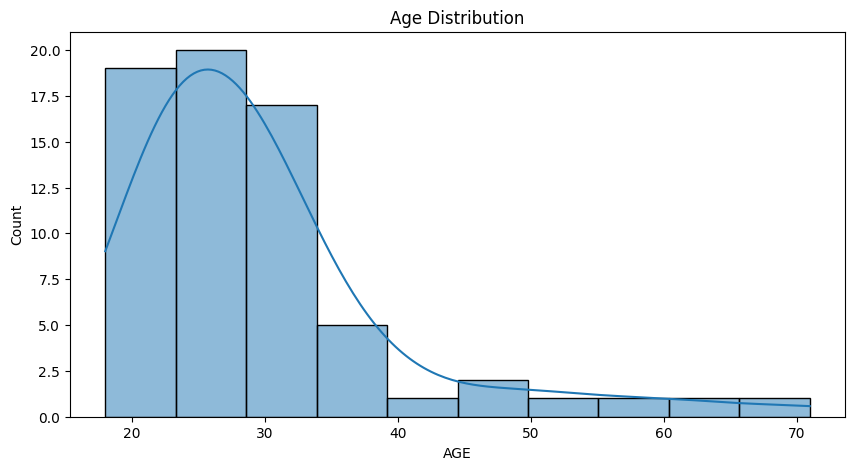

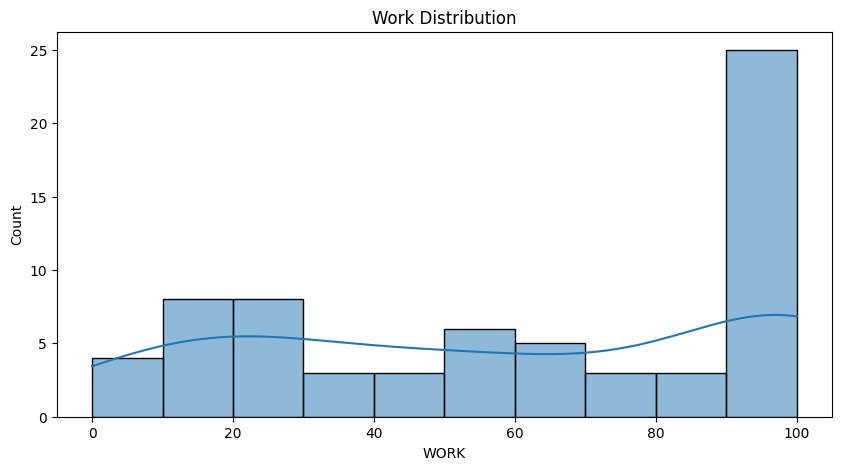

In [17]:
# Histograms for distribution of age and work
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], bins=10, kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(10, 5))
sns.histplot(data['WORK'], bins=10, kde=True)
plt.title('Work Distribution')

Text(0.5, 1.0, 'Boxplot for JC and SDT')

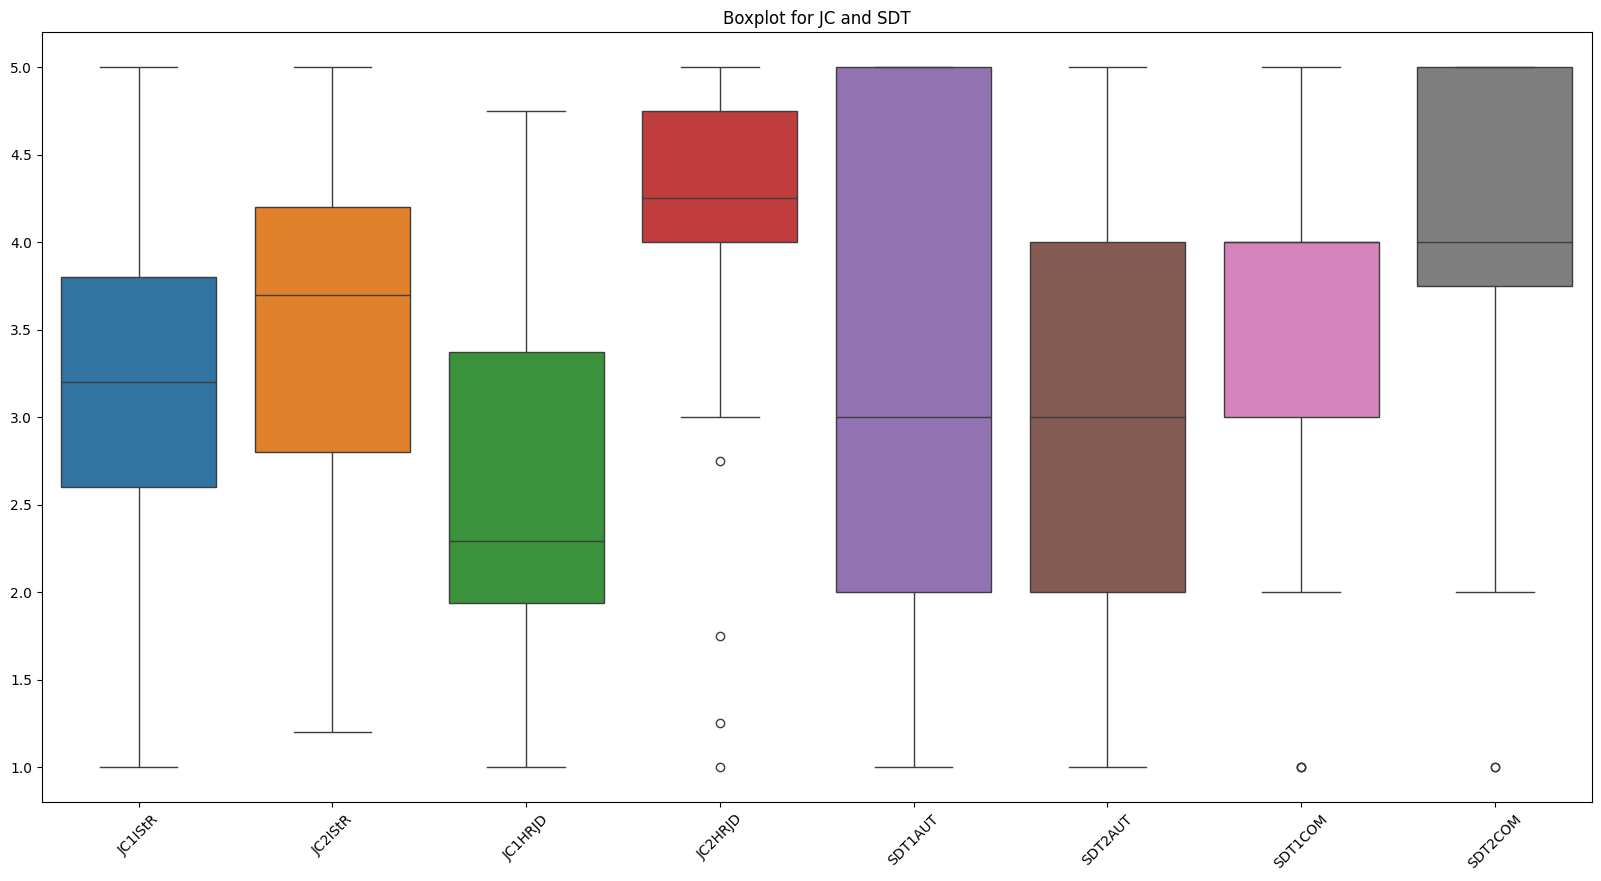

In [18]:
# Boxplots JC and SDT variables to graphically see differences
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['JC1IStR', 'JC2IStR', 'JC1HRJD', 'JC2HRJD', 'SDT1AUT', 'SDT2AUT', 'SDT1COM', 'SDT2COM']])
plt.xticks(rotation=45)
plt.title('Boxplot for JC and SDT')

In [26]:
## Difference between HRJD is still strong

Text(0.5, 1.0, 'Boxplot for PROD and DIF')

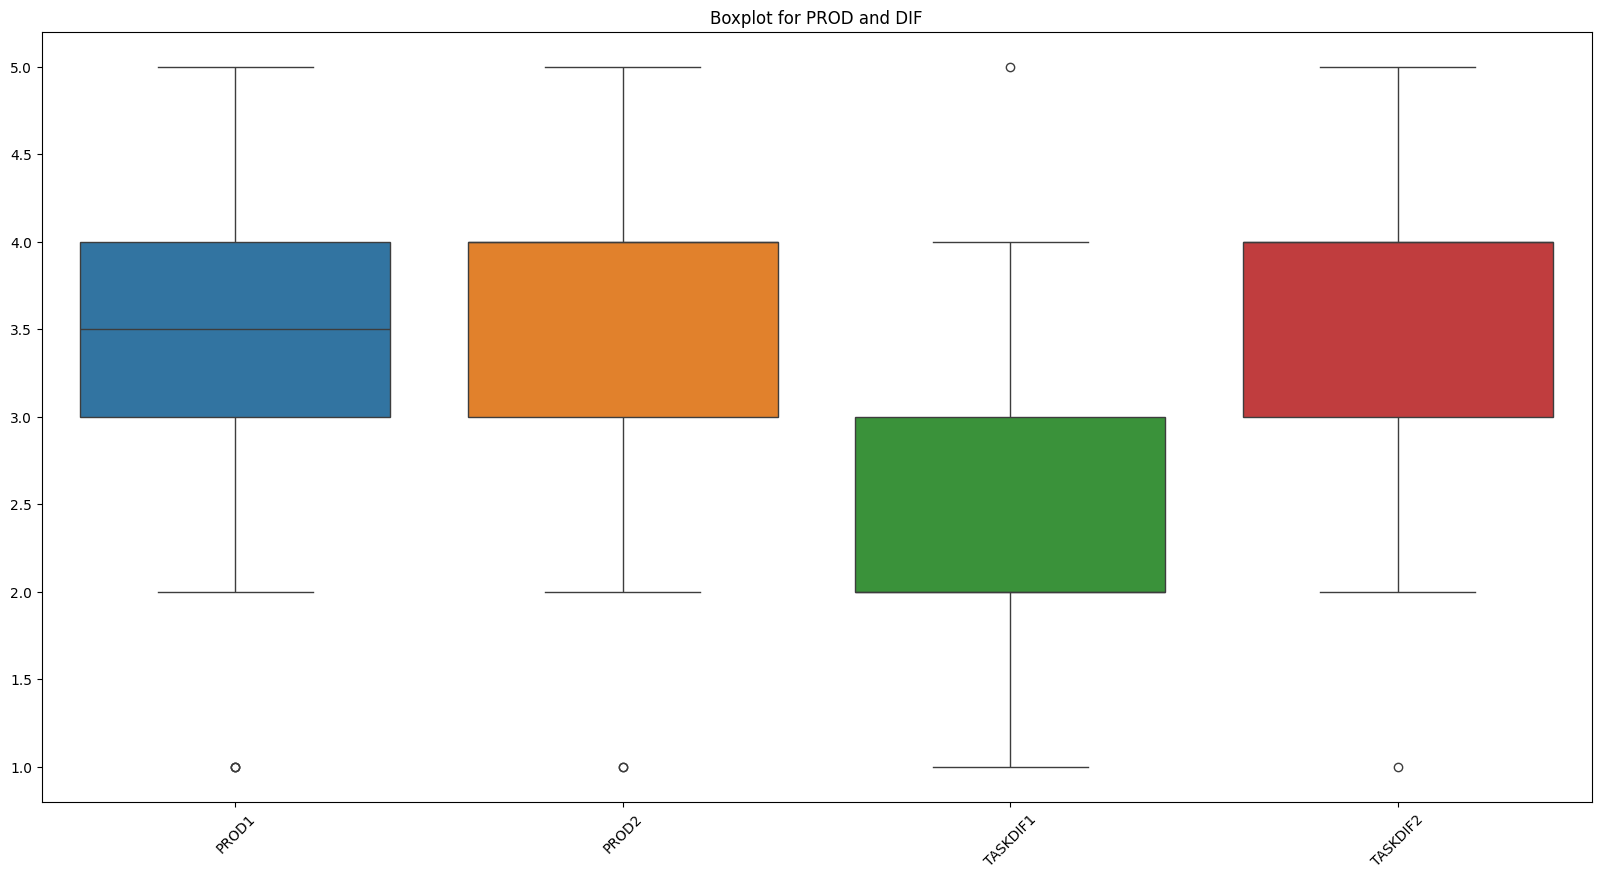

In [19]:
# Boxplots variables that could be used as controls
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['PROD1', 'PROD2', 'TASKDIF1', 'TASKDIF2']])
plt.xticks(rotation=45)
plt.title('Boxplot for PROD and DIF')

In [ ]:
## Productivity for control and experimental condition seems to be same. For task difficulty participants in control condition are more distributed
## It seems a bit strange that people in the experimental condition had a feeling that the task was more difficult
## CAREFUL: No claim about which task was more difficult but only about the conditions

Text(0.5, 1.0, 'Boxplot for SE')

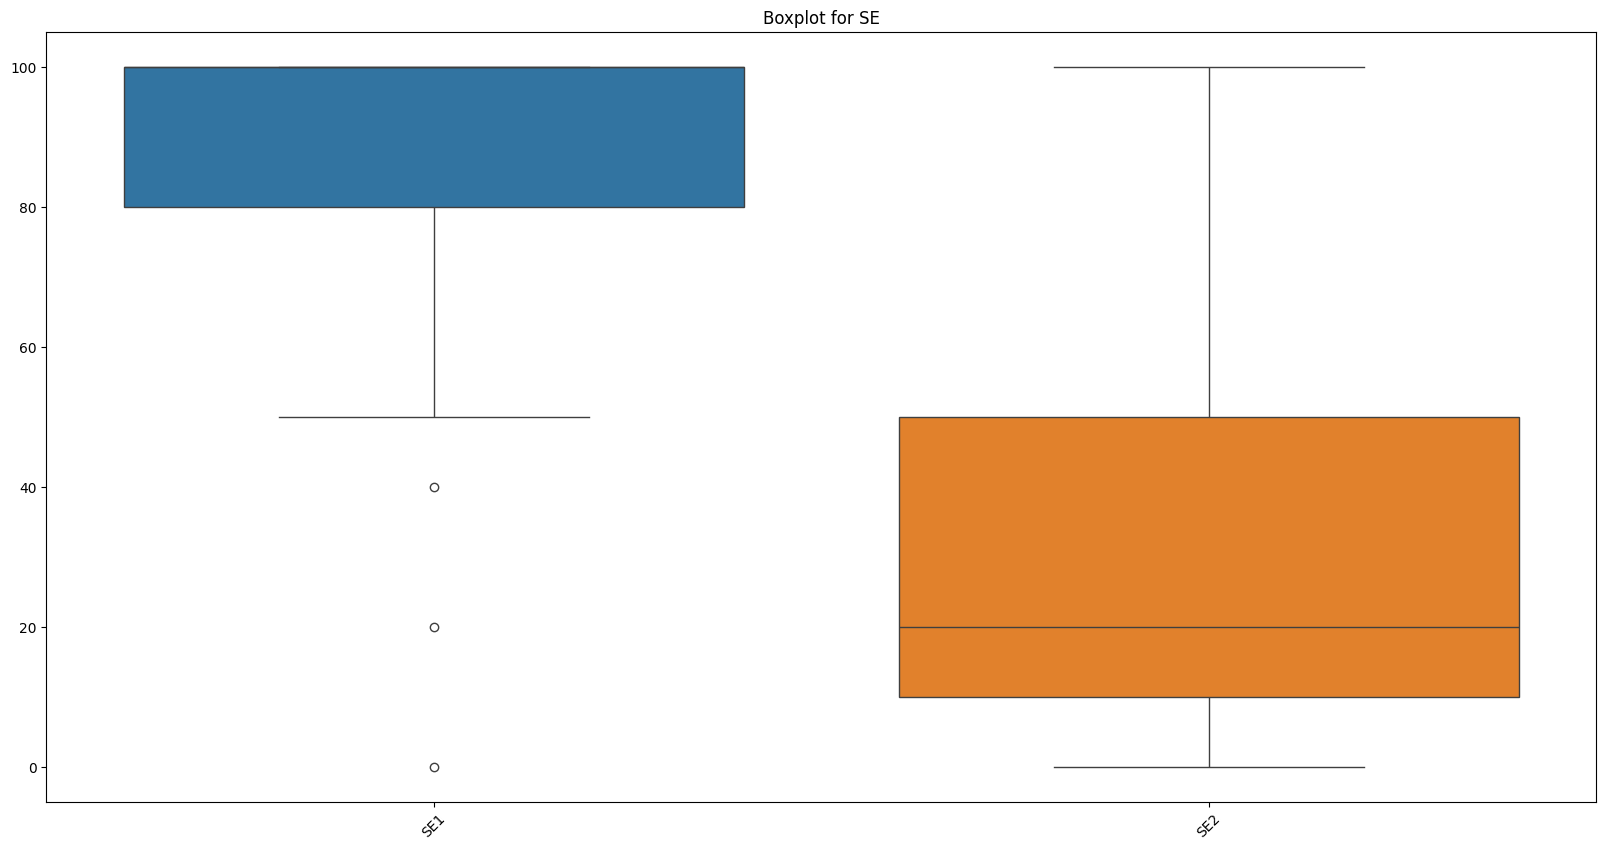

In [20]:
# Boxplots variables that could be used as controls (different boxplot because of metrics)
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['SE1', 'SE2']])
plt.xticks(rotation=45)
plt.title('Boxplot for SE')

In [ ]:
## Nothing surprising: People using GPT thought they had done less (no positive or negative statement)

Text(0.5, 1.0, 'Correlation Heatmap')

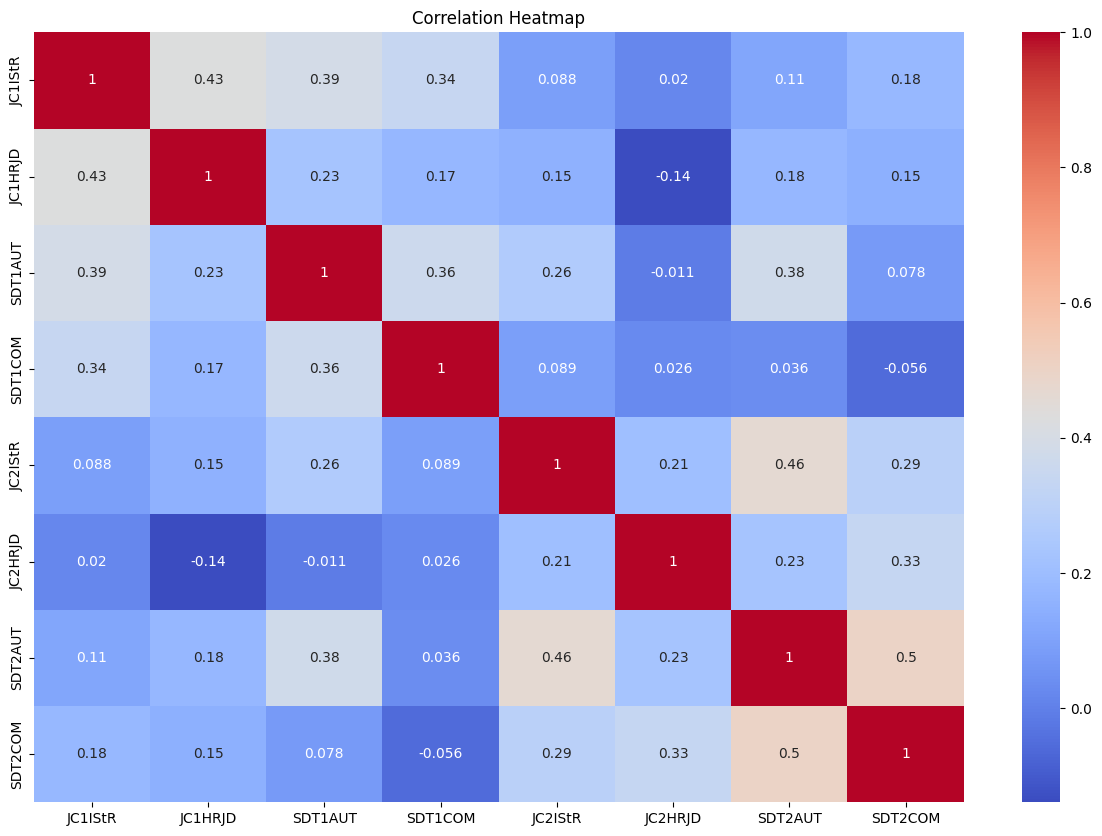

In [21]:
# Correlation Heatmap for JC and SDT
plt.figure(figsize=(15, 10))
correlation_matrix = data_plot1=data[['JC1IStR', 'JC1HRJD', 'SDT1AUT', 'SDT1COM', 'JC2IStR', 'JC2HRJD', 'SDT2AUT', 'SDT2COM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [ ]:
# No threat of multicollinearity

Text(0.5, 1.0, 'Correlation Heatmap')

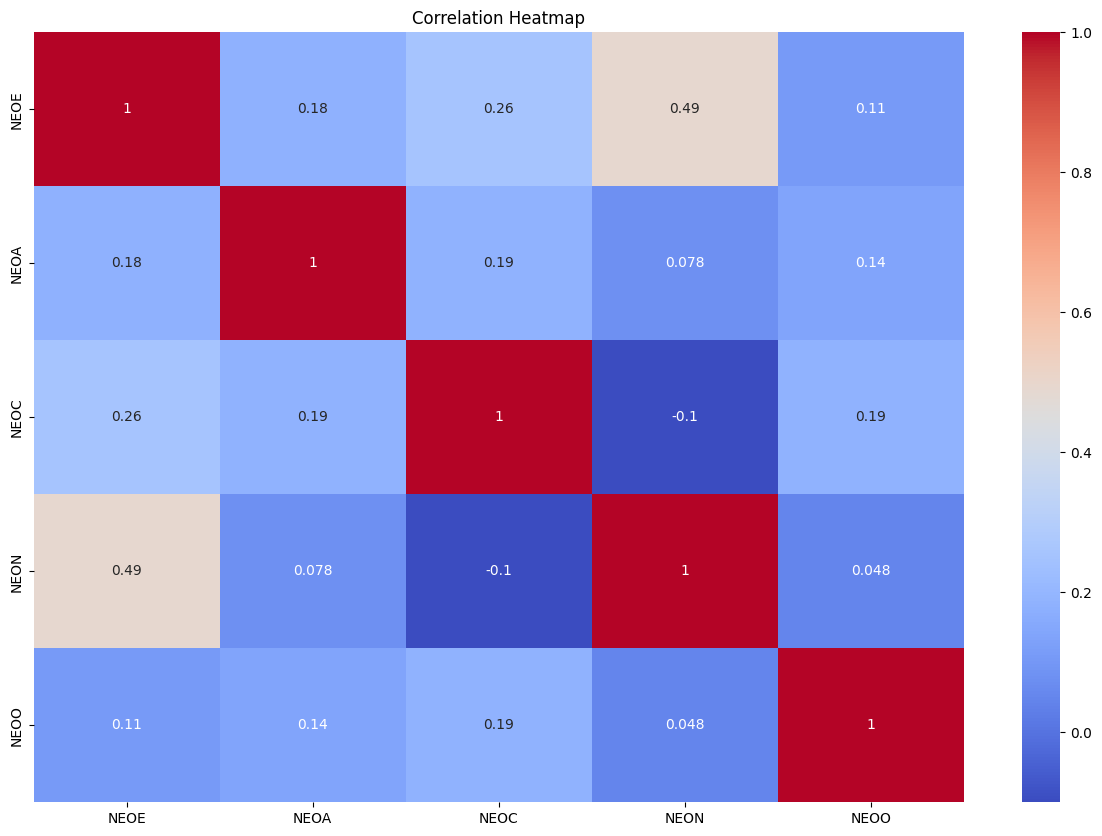

In [22]:
# Correlation Heatmap for Big Five
plt.figure(figsize=(15, 10))
correlation_matrix = data_plot2=data[['NEOE', 'NEOA', 'NEOC', 'NEON', 'NEOO']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.02, 'Pairwise Correlations Big Five Personality Traits')

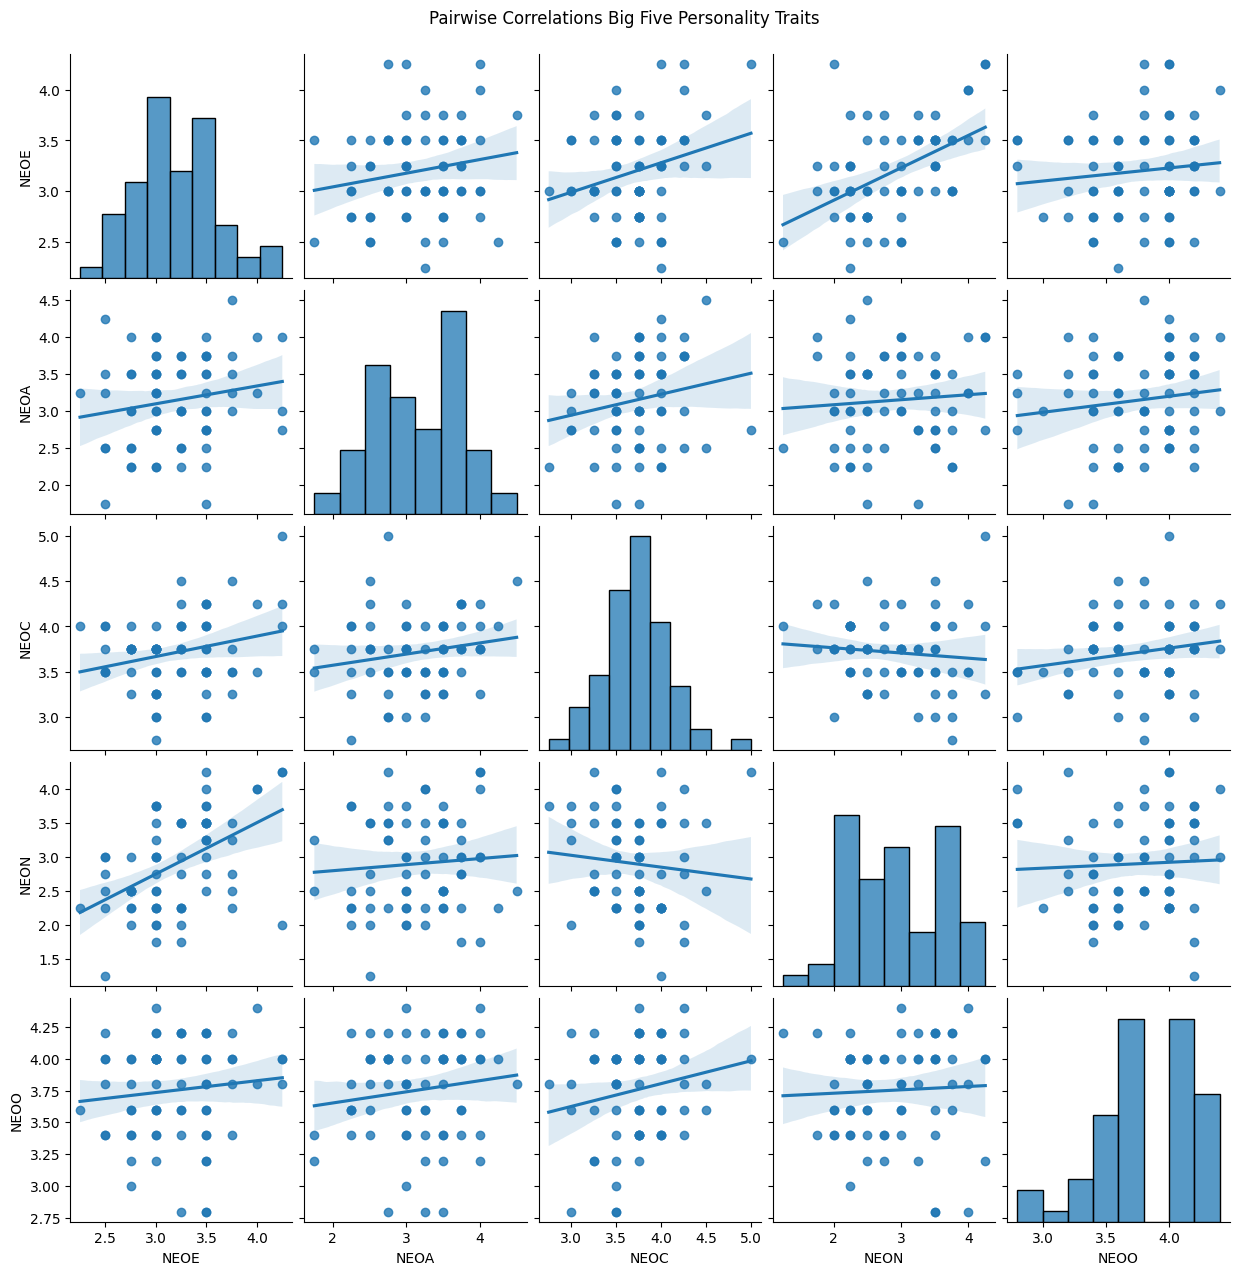

In [23]:
# Look at a pairwise correlation plot for Big Five to see trends
sns.pairplot(data[['NEOE', 'NEOA', 'NEOC', 'NEON', 'NEOO']], kind='reg')
plt.suptitle('Pairwise Correlations Big Five Personality Traits', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations JC')

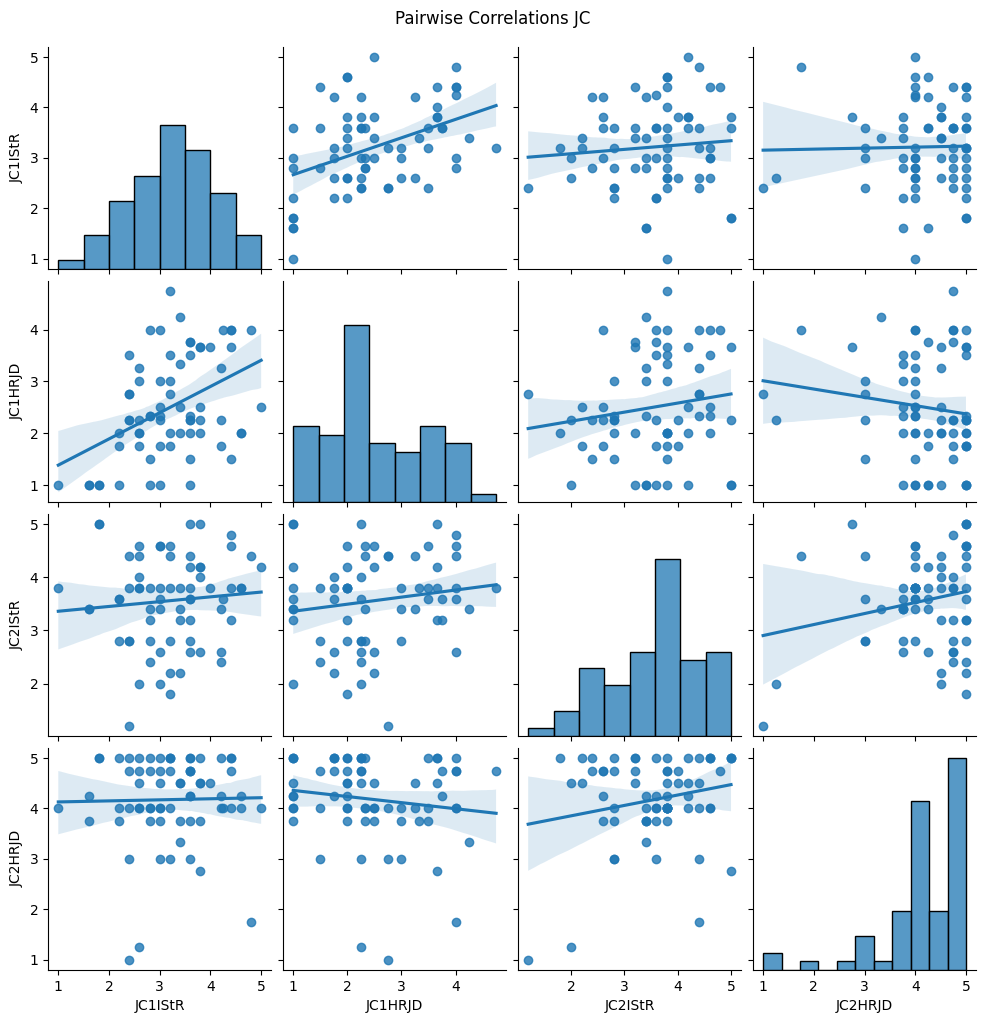

In [24]:
# Look at a pairwise correlation plot for JC to see trends
sns.pairplot(data[['JC1IStR', 'JC1HRJD', 'JC2IStR', 'JC2HRJD']], kind='reg')
plt.suptitle('Pairwise Correlations JC', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations SDT')

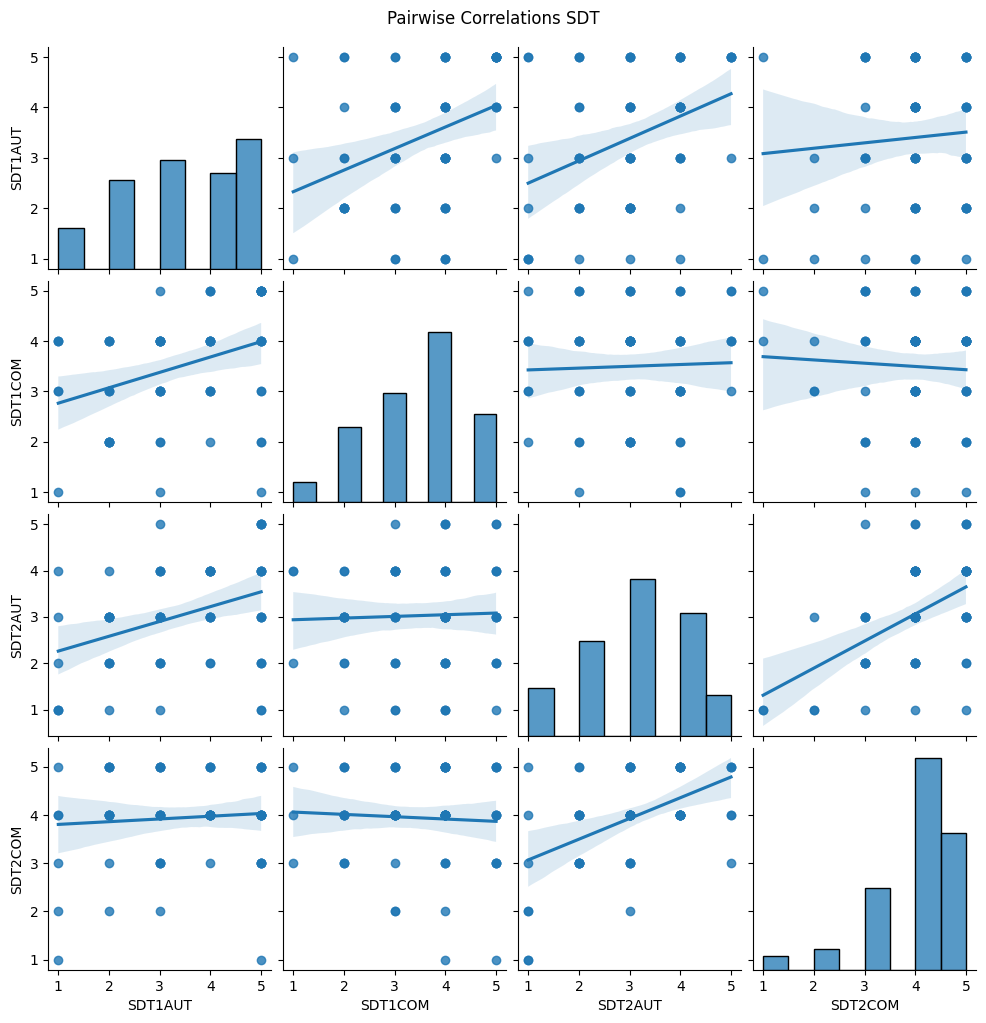

In [25]:
# Look at a pairwise correlation plot for SDT to see trends
sns.pairplot(data[['SDT1AUT', 'SDT1COM', 'SDT2AUT', 'SDT2COM']], kind='reg')
plt.suptitle('Pairwise Correlations SDT', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations of JC2IStR and JC2HRJD with Big Five Personality Traits')

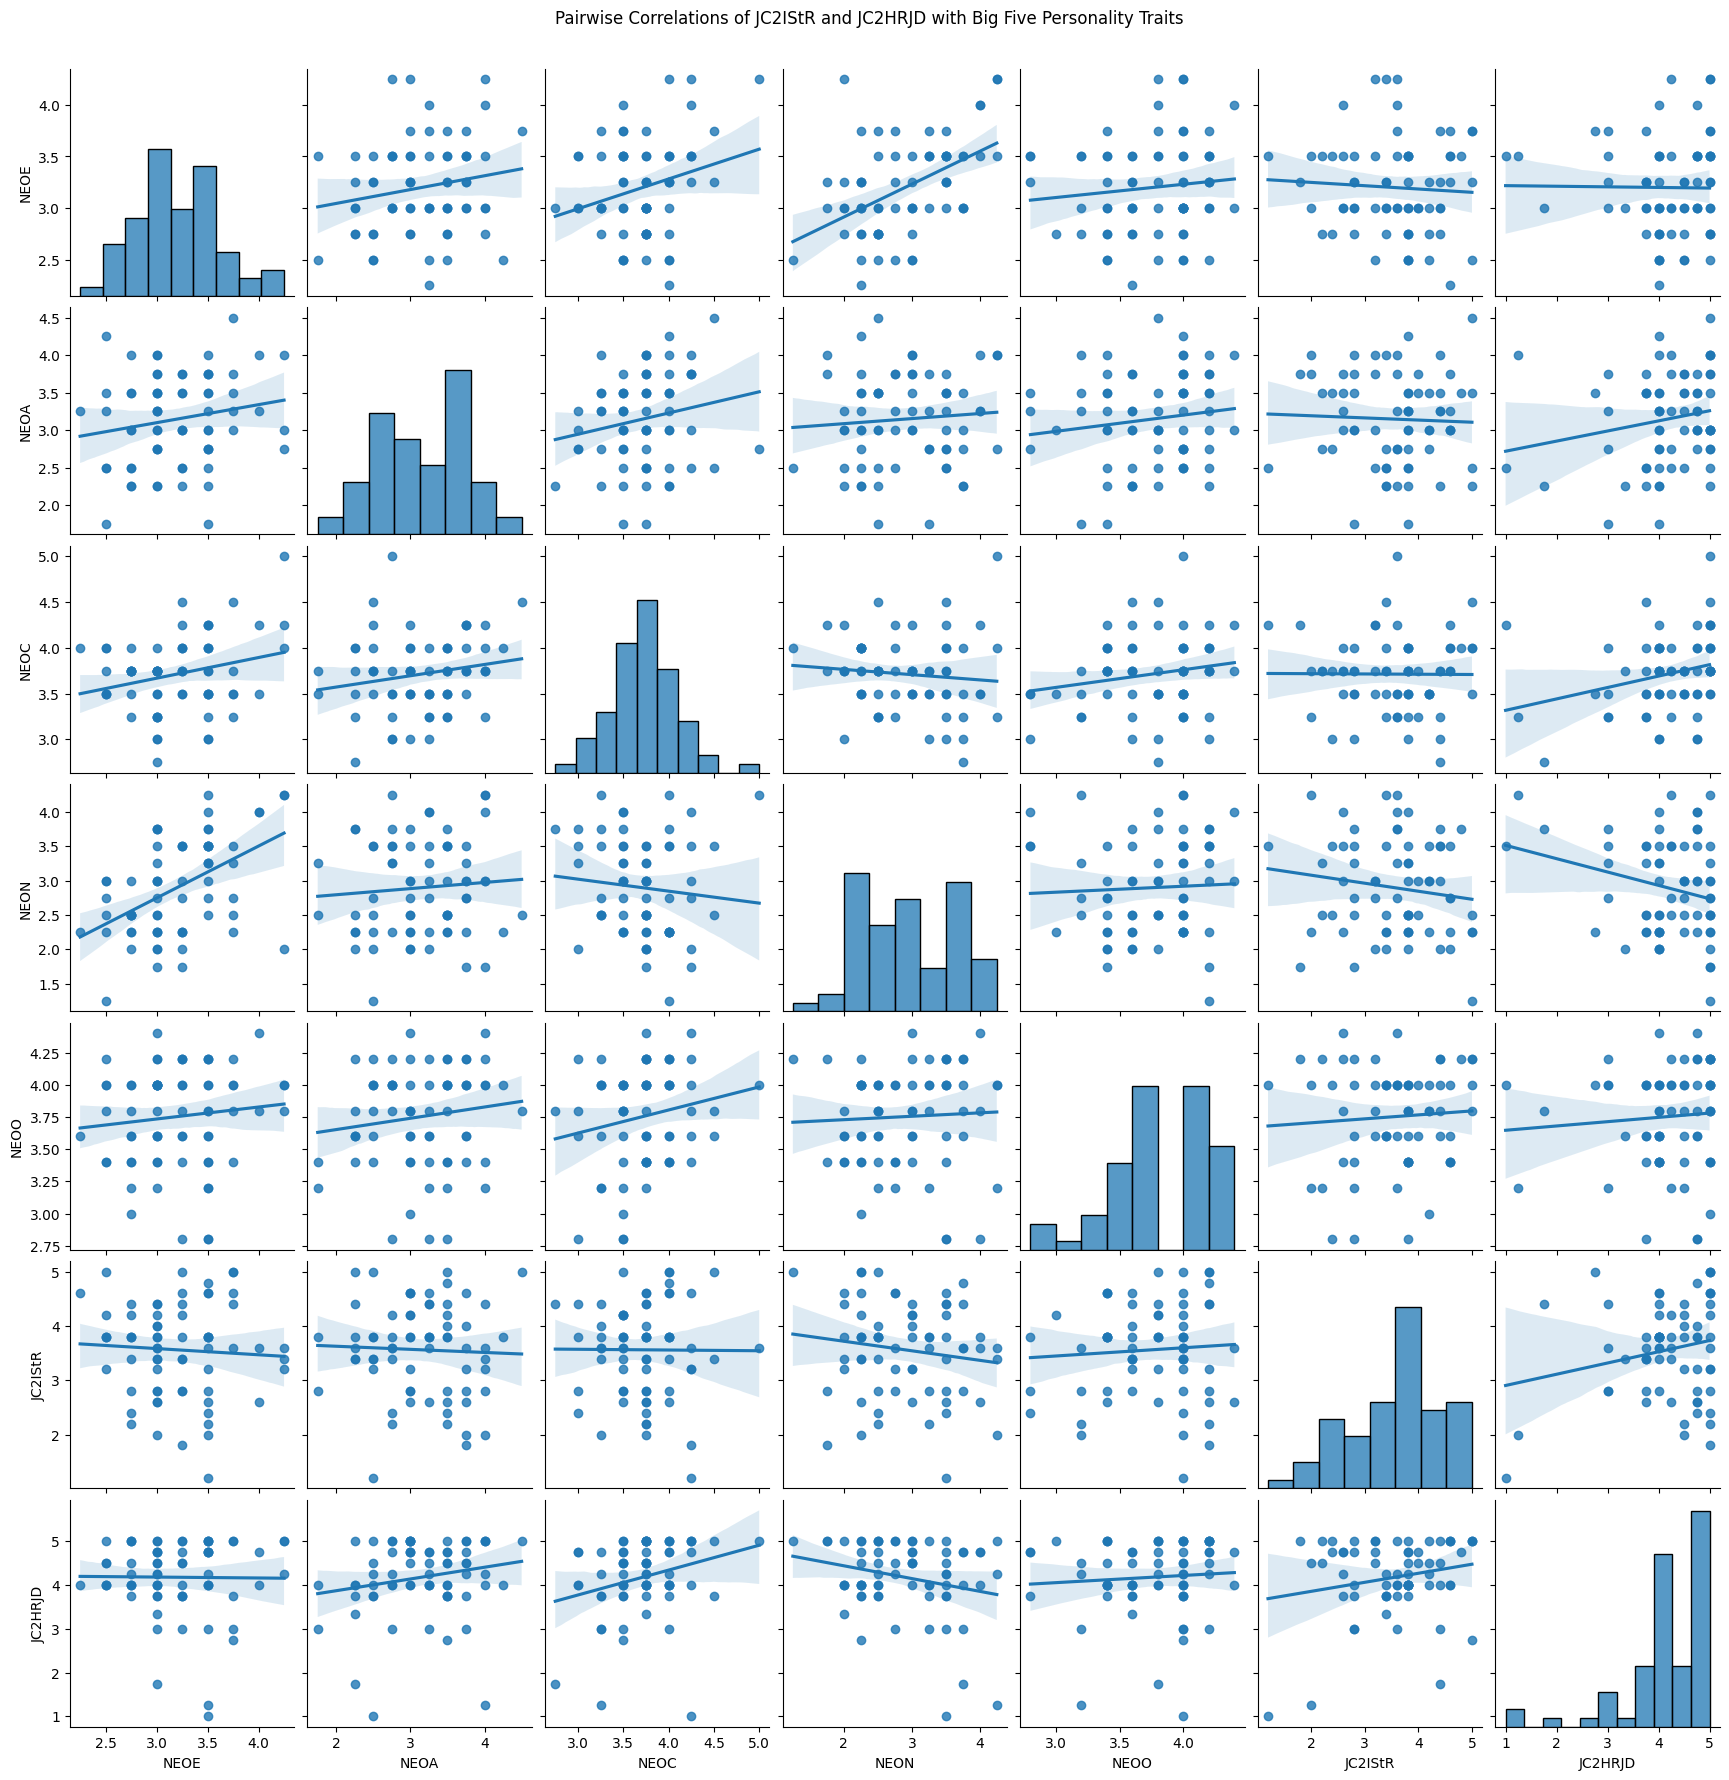

In [26]:
# Create a pairwise correlation plot
sns.pairplot(data[['NEOE', 'NEOA', 'NEOC', 'NEON', 'NEOO', 'JC2IStR', 'JC2HRJD']], kind='reg')
plt.suptitle('Pairwise Correlations of JC2IStR and JC2HRJD with Big Five Personality Traits', y=1.02)

In [ ]:
# Especially interesting for HRJD -> It seems like the NEO Trait influences in some ways

In [27]:
# Test for normaility with the Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality:")
for column in ['JC1IStR', 'JC1HRJD', 'JC2IStR', 'JC2HRJD', 'SDT1AUT', 'SDT1COM', 'SDT2AUT', 'SDT2COM']:
    stat, p = stats.shapiro(data[column])
    print(f'{column}: Statistics={stat:.3f}, p={p:.3f}')

Shapiro-Wilk Test for Normality:
JC1IStR: Statistics=0.988, p=0.744
JC1HRJD: Statistics=0.948, p=0.006
JC2IStR: Statistics=0.969, p=0.090
JC2HRJD: Statistics=0.817, p=0.000
SDT1AUT: Statistics=0.887, p=0.000
SDT1COM: Statistics=0.896, p=0.000
SDT2AUT: Statistics=0.916, p=0.000
SDT2COM: Statistics=0.833, p=0.000


In [ ]:
## A significant p-value (<0.05) indicates that the data is not normally distributed. This is the case for most of the variables
## Because parametric tests, i.e. the paired t-test, assume normal distribution it could be also approriate to use non-parametric tests
## Normally Distributed Variables: JC1IStR and JC2IStR (p > 0.05) / Not Normally Distributed Variables: JC1HRJD, JC2HRJD, SDT1AUT, SDT1COM, SDT2AUT, SDT2COM (p < 0.05)
## Therefore, I will also use the Wilcoxon signed-rank test for within-subject comparisons and the Mann-Whitney U test for between-group comparisons

In [32]:
# Calcule skewness and kurtosis for JC and SDT
skewness = data[['JC1IStR', 'JC1HRJD', 'JC2IStR', 'JC2HRJD', 'SDT1AUT', 'SDT1COM', 'SDT2AUT', 'SDT2COM']].skew()
kurtosis = data[['JC1IStR', 'JC1HRJD', 'JC2IStR', 'JC2HRJD', 'SDT1AUT', 'SDT1COM', 'SDT2AUT', 'SDT2COM']].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 JC1IStR   -0.223273
JC1HRJD    0.189694
JC2IStR   -0.359984
JC2HRJD   -1.429950
SDT1AUT   -0.167997
SDT1COM   -0.405848
SDT2AUT   -0.102320
SDT2COM   -0.790491
dtype: float64

Kurtosis:
 JC1IStR   -0.344806
JC1HRJD   -0.853211
JC2IStR   -0.346722
JC2HRJD    2.405847
SDT1AUT   -1.085893
SDT1COM   -0.598602
SDT2AUT   -0.604290
SDT2COM    0.263988
dtype: float64


In [ ]:
## Skewness suggests that most variables have relatively symmetrical distribution
## Kurtosis suggest that most variables have distributions with lighter tails than a normal distribution

### Differences in Group

In [85]:
# Load the data
data = pd.read_csv('data_merged_all_analysis.csv')

In [28]:
# Paired t-tests for within-subject comparisons (control vs. experimental)
paired_tests = {
    'Job Crafting Increasing Structural Job Ressources': ['JC1IStR', 'JC2IStR'],
    'Job Crafting Decreasing Hindering Job Demands': ['JC1HRJD', 'JC2HRJD'],
    'Self-Determination Autonomy': ['SDT1AUT', 'SDT2AUT'],
    'Self-Determination Competence': ['SDT1COM', 'SDT2COM'],
    'Self-Efficacy': ['SE1', 'SE2'],
    'Productivity': ['PROD1', 'PROD2'],
    'Task Difficulty': ['TASKDIF1', 'TASKDIF2']
}

for test, (control, experimental) in paired_tests.items():
    stat, p = ttest_rel(data[control], data[experimental])
    print(f"{test} Control vs. Experimental: t={stat:.3f}, p={p:.3f}")

Job Crafting Increasing Structural Job Ressources Control vs. Experimental: t=-2.496, p=0.015
Job Crafting Decreasing Hindering Job Demands Control vs. Experimental: t=-9.892, p=0.000
Self-Determination Autonomy Control vs. Experimental: t=2.212, p=0.030
Self-Determination Competence Control vs. Experimental: t=-2.409, p=0.019
Self-Efficacy Control vs. Experimental: t=10.484, p=0.000
Productivity Control vs. Experimental: t=-1.284, p=0.204
Task Difficulty Control vs. Experimental: t=-4.953, p=0.000


In [67]:
## Significant differences in IStR, HDR, SE, and TASDIF. 
## No significanct difference for COMP, AUT, PROD

In [29]:
# Independent t-tests for between-subject comparisons ((with vs. without prompt support in experimental conditions) based on 'Prompt_Support'
# Split  dataset based on binary condition
data_with_support = data[data['Prompt_Support'] == 1]
data_without_support = data[data['Prompt_Support'] == 0]

# Independent t-tests for between-subjects (experimental I vs II))
independent_tests = {
    'Job Crafting Increasing Structural Job Ressources': 'JC2IStR',
    'Job Crafting Decreasing Hindering Job Demands': 'JC2HRJD',
    'Self-Determination Autonomy': 'SDT2AUT',
    'Self-Determination Competence': 'SDT2COM',
    'Self-Efficacy': 'SE2',
    'Productivity': 'PROD2',
    'Task Difficulty': 'TASKDIF2'
}

for test, column in independent_tests.items():
    stat, p = ttest_ind(data_with_support[column], data_without_support[column])
    print(f"{test} With vs. Without Prompt Support: t={stat:.3f}, p={p:.3f}")

Job Crafting Increasing Structural Job Ressources With vs. Without Prompt Support: t=1.375, p=0.174
Job Crafting Decreasing Hindering Job Demands With vs. Without Prompt Support: t=0.687, p=0.494
Self-Determination Autonomy With vs. Without Prompt Support: t=0.228, p=0.820
Self-Determination Competence With vs. Without Prompt Support: t=-0.787, p=0.434
Self-Efficacy With vs. Without Prompt Support: t=-0.502, p=0.617
Productivity With vs. Without Prompt Support: t=1.219, p=0.227
Task Difficulty With vs. Without Prompt Support: t=0.307, p=0.760


In [ ]:
## No statistical significant differences between participants who had prompt support and those who didn't 

In [30]:
# Compare job crafting constructs between conditions using Wilcoxon signed-rank test to improve robustness
# List of variables for comparisons
pair = {
    'Job Crafting Increasing Structural Job Ressources': ['JC1IStR', 'JC2IStR'],
    'Job Crafting Decreasing Hindering Job Demands': ['JC1HRJD', 'JC2HRJD'],
    'Self-Determination Autonomy': ['SDT1AUT', 'SDT2AUT'],
    'Self-Determination Competence': ['SDT1COM', 'SDT2COM'],
    'Self-Efficacy': ['SE1', 'SE2'],
    'Productivity': ['PROD1', 'PROD2'],
    'Task Difficulty': ['TASKDIF1', 'TASKDIF2']
}

# Wilcoxon Signed-Rank Test 
print("Within-Subject Comparisons (Control vs. Experimental):")
for test, (control, experimental) in paired_tests.items():
    stat, p = wilcoxon(data[control], data[experimental])
    print(f"Wilcoxon Signed-Rank Test for {test}: T={stat:.3f}, p={p:.3f}")

Within-Subject Comparisons (Control vs. Experimental):
Wilcoxon Signed-Rank Test for Job Crafting Increasing Structural Job Ressources: T=723.000, p=0.034
Wilcoxon Signed-Rank Test for Job Crafting Decreasing Hindering Job Demands: T=107.000, p=0.000
Wilcoxon Signed-Rank Test for Self-Determination Autonomy: T=305.000, p=0.036
Wilcoxon Signed-Rank Test for Self-Determination Competence: T=417.500, p=0.018
Wilcoxon Signed-Rank Test for Self-Efficacy: T=118.500, p=0.000
Wilcoxon Signed-Rank Test for Productivity: T=414.000, p=0.150
Wilcoxon Signed-Rank Test for Task Difficulty: T=113.000, p=0.000


In [ ]:
## The Normally Distributed Variables were JC1IStR and JC2IStR -> Ignore the result there
## So, though probably more robust, the findings don't change

In [31]:
# Function to remove outliers based on Z-score
def remove_outliers(data, column_list):
    for column in column_list:
        data[column] = data[column].astype(float)  # Ensure the data is float
        z_scores = stats.zscore(data[column])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3)  # Keeping only rows with a Z-score < 3
        data = data[filtered_entries]
    return data

# Columns to check for outliers
columns_to_check = ['JC1IStR', 'JC2IStR', 'JC1HRJD', 'JC2HRJD', 'SDT1AUT', 'SDT2AUT', 'SDT1COM', 'SDT2COM']

# Remove outliers
data_clean = remove_outliers(data, columns_to_check)

In [32]:
# Wilcoxon Signed-Rank Test 
print("Within-Subject Comparisons (Control vs. Experimental):")
for test, (control, experimental) in paired_tests.items():
    stat, p = wilcoxon(data_clean[control], data_clean[experimental])
    print(f"Wilcoxon Signed-Rank Test for {test}: T={stat:.3f}, p={p:.3f}")

Within-Subject Comparisons (Control vs. Experimental):
Wilcoxon Signed-Rank Test for Job Crafting Increasing Structural Job Ressources: T=586.500, p=0.010
Wilcoxon Signed-Rank Test for Job Crafting Decreasing Hindering Job Demands: T=59.000, p=0.000
Wilcoxon Signed-Rank Test for Self-Determination Autonomy: T=302.500, p=0.085
Wilcoxon Signed-Rank Test for Self-Determination Competence: T=296.000, p=0.002
Wilcoxon Signed-Rank Test for Self-Efficacy: T=116.000, p=0.000
Wilcoxon Signed-Rank Test for Productivity: T=360.000, p=0.102
Wilcoxon Signed-Rank Test for Task Difficulty: T=113.000, p=0.000


In [ ]:
## No changes in significances

In [33]:
# Compare job crafting constructs between conditions using Mann-Whitney U test to improve robustness
# Filtering groups based on 'Prompt_Support'
group_no_support = data[data['Prompt_Support'] == 0]
group_with_support = data[data['Prompt_Support'] == 1]

# Variables for comparisons (experimental condition I vs. II)
between_variables = ['JC2IStR','JC2HRJD', 'SDT2AUT', 'SDT2COM']

# Mann-Whitney U test
print("\nExperimental I vs. II:")
for variable in between_variables:
    stat, p = stats.mannwhitneyu(group_no_support[variable], group_with_support[variable])
    print(f"{variable}: U={stat}, p={p}")



Experimental I vs. II:
JC2IStR: U=491.0, p=0.29659645303287685
JC2HRJD: U=508.0, p=0.4000619072918109
SDT2AUT: U=567.0, p=0.9138730501862342
SDT2COM: U=671.5, p=0.21193080538245201


In [ ]:
## Though probably more robust, the findings don't change